In [33]:
import sys
from pathlib import Path
from IPython.display import Image

import cv2
import numpy as np

sys.path.append('../')
from utils.drawer import draw_bbox, draw_marker

In [39]:
def get_selective_search(img, strategy='q'):
    gs = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    gs.setBaseImage(img)

    if strategy == 's':
        gs.switchToSingleStrategy()
    elif strategy == 'f':
        gs.switchToSelectiveSearchFast()
    elif strategy == 'q':
        gs.switchToSelectiveSearchQuality()
    else:
        print(__doc__)
        sys.exit(1)

    rects = gs.process()
    # rects[:, 2] += rects[:, 0]
    # rects[:, 3] += rects[:, 1]

    return rects


def calc_iou(predict_bbox, target_bboxes):
    """
    IOUを計算
    Args:
        predict_bbox[List[int, int, int, int]]: 予測したbbox。bboxは[左上x座標, 左上y座標, 幅, 高さ]
        target_bboxes[List[int, int, int, int]] or List[List[int, int, int, int]]]: 正解値のbbox(複数でも可)
    """
    if isinstance(predict_bbox, list):
        predict_bbox = np.array(predict_bbox)
    if isinstance(target_bboxes, list):
        target_bboxes = np.array(target_bboxes)

    target_bboxes = target_bboxes.reshape(-1, 4)

    x_min_predict_bbox, y_min_predict_bbox, width_predict_bbox, height_predict_bbox = predict_bbox

    x_max_predict_bbox = x_min_predict_bbox + width_predict_bbox
    y_max_predict_bbox = y_min_predict_bbox + height_predict_bbox

    predict_bbox_size = width_predict_bbox * height_predict_bbox
    target_bbox_sizes = target_bboxes[:, 2] * target_bboxes[:, 3]

    # [左上x座標, 左上y座標, 右下x座標, 右下y座標]の形に変換
    reshaped_target_bboxes = np.copy(target_bboxes)
    reshaped_target_bboxes[:, 2:] += reshaped_target_bboxes[:, :2]

    reshaped_target_bboxes[:, 0::2] = np.clip(reshaped_target_bboxes[:, 0::2], x_min_predict_bbox, x_max_predict_bbox)
    reshaped_target_bboxes[:, 1::2] = np.clip(reshaped_target_bboxes[:, 1::2], y_min_predict_bbox, y_max_predict_bbox)

    bbox_product_sizes = (reshaped_target_bboxes[:, 2] - reshaped_target_bboxes[:, 0]) * (reshaped_target_bboxes[:, 3] - reshaped_target_bboxes[:, 1])
    bbox_union_size = predict_bbox_size + target_bbox_sizes - bbox_product_sizes
    
    ious = bbox_product_sizes / bbox_union_size
    return ious.tolist()

In [46]:
calc_iou([100,100,100,100], [[100,150,100,100], [150,100,100,100], [100, 100, 100, 100], [200, 200, 100, 100]])

[0.3333333333333333, 0.3333333333333333, 1.0, 0.0]

In [44]:
a = np.arange(100000)
for _ in range(1000000):
    b = a.tolist()

In [45]:
a = np.arange(100000)
for _ in range(1000000):
    b = list(a)

In [25]:
iou([100,100,200,200], [100,150,200,250])

15251
5151


0.33774834437086093

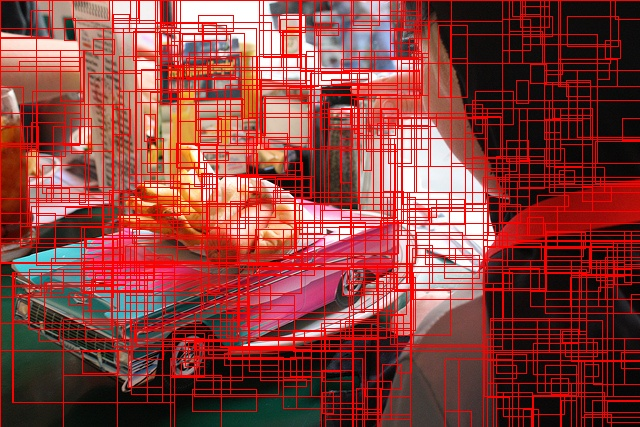

In [6]:
image_path = Path('../dataset/reshaped_coco/dataset/00000000.jpg')

img = cv2.imread(str(image_path), cv2.IMREAD_COLOR)
rects = get_selective_search(img, strategy='s')
for rect in rects:
    img = cv2.rectangle(img, (rect[0], rect[1]), (rect[2], rect[3]), (0, 0, 255), 1)
    # img = draw_bbox(img, *rect, line_width=1)

Image(cv2.imencode('.jpg', img)[1].tobytes())

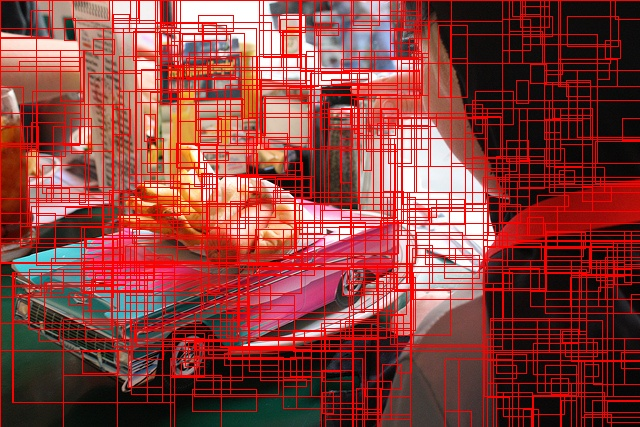

In [9]:
image_path = Path('../dataset/reshaped_coco/dataset/00000000.jpg')

img = cv2.imread(str(image_path), cv2.IMREAD_COLOR)
rects = get_selective_search(img, strategy='s')
for rect in rects:
    # img = cv2.rectangle(img, (rect[0], rect[1]), (rect[2], rect[3]), (0, 0, 255), 1)
    img = draw_bbox(img, *rect, line_width=1)

Image(cv2.imencode('.jpg', img)[1].tobytes())